In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import matplotlib.patches as mpatches
import scipy.stats as st

In [2]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Check for empty spots
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


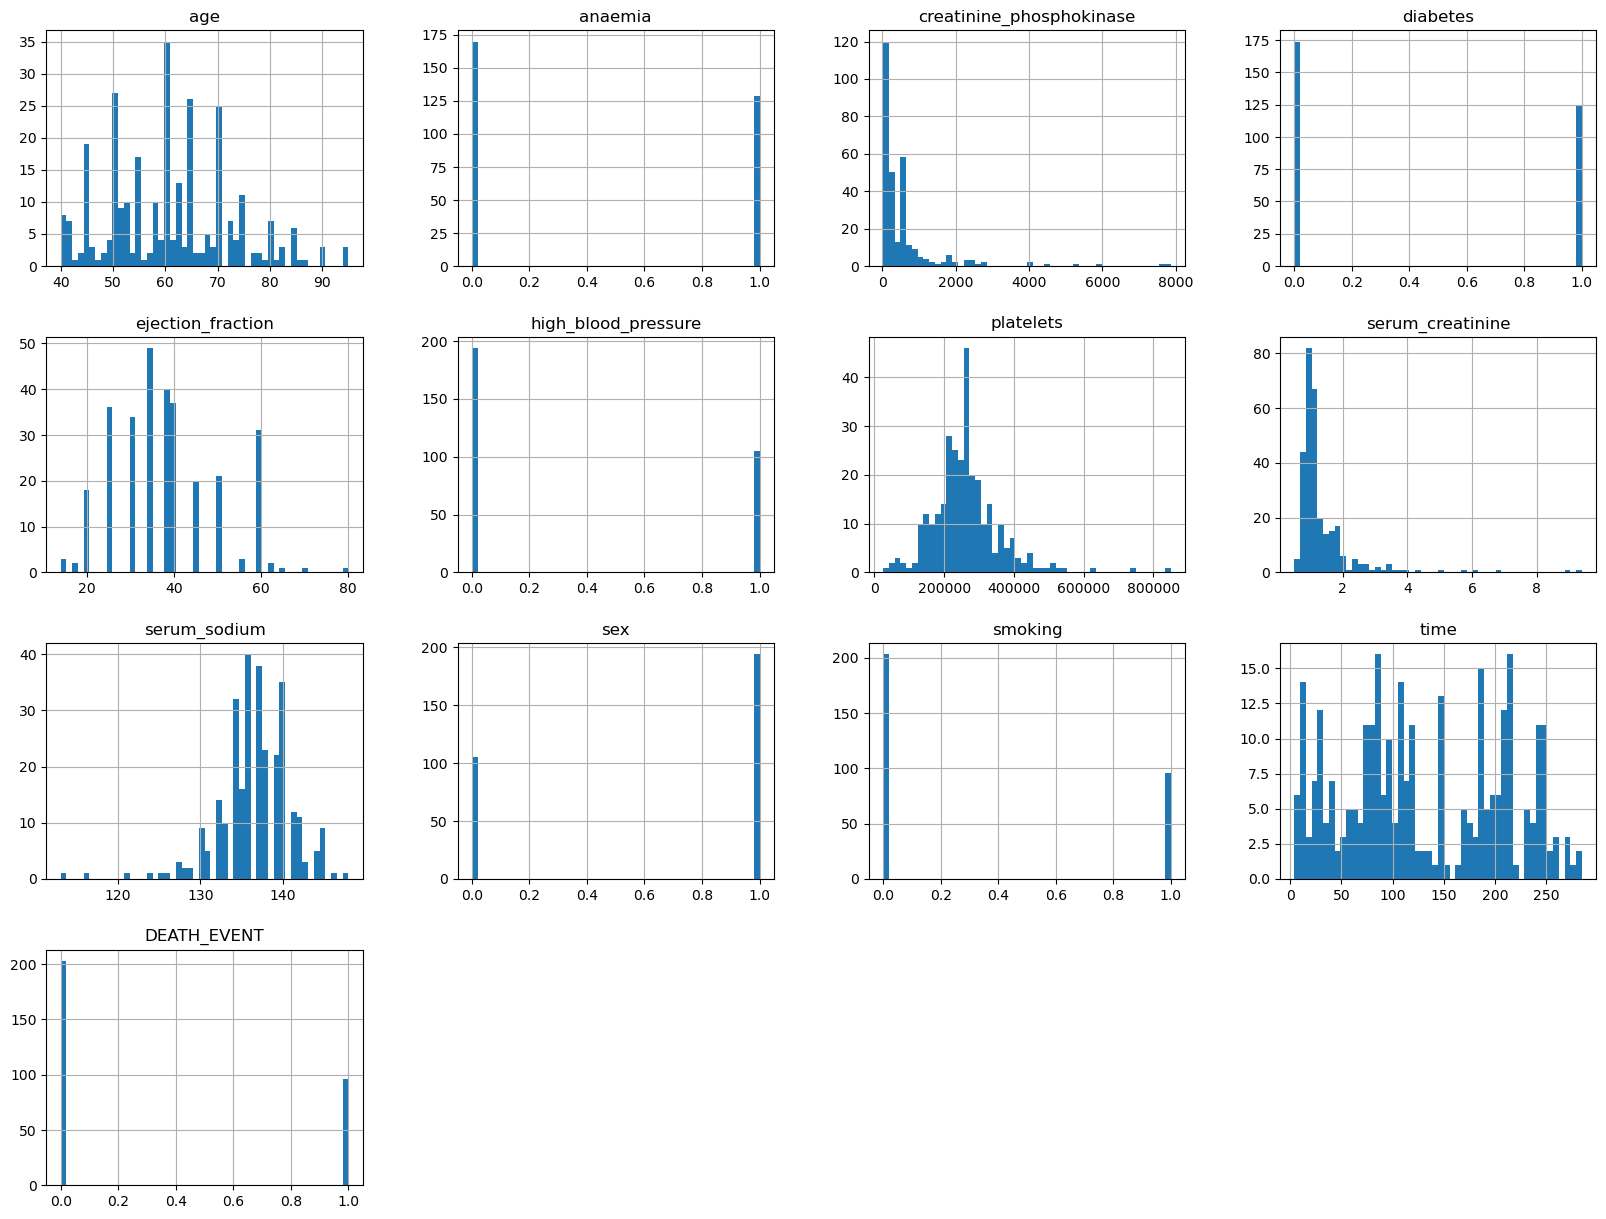

In [4]:
heart_df.hist(bins=50, figsize=(20,15))
plt.show()

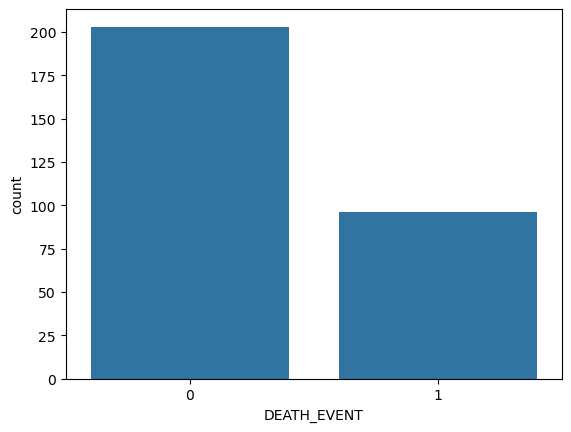

In [5]:
#"Death_Event" represents if the patient died during the follow up period.
#0 = living | 1 = deceased

death = heart_df['DEATH_EVENT']
sns.countplot(x=death)
plt.show()

C:\Users\18307\AppData\Local\Temp\ipykernel_34164\1049847329.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


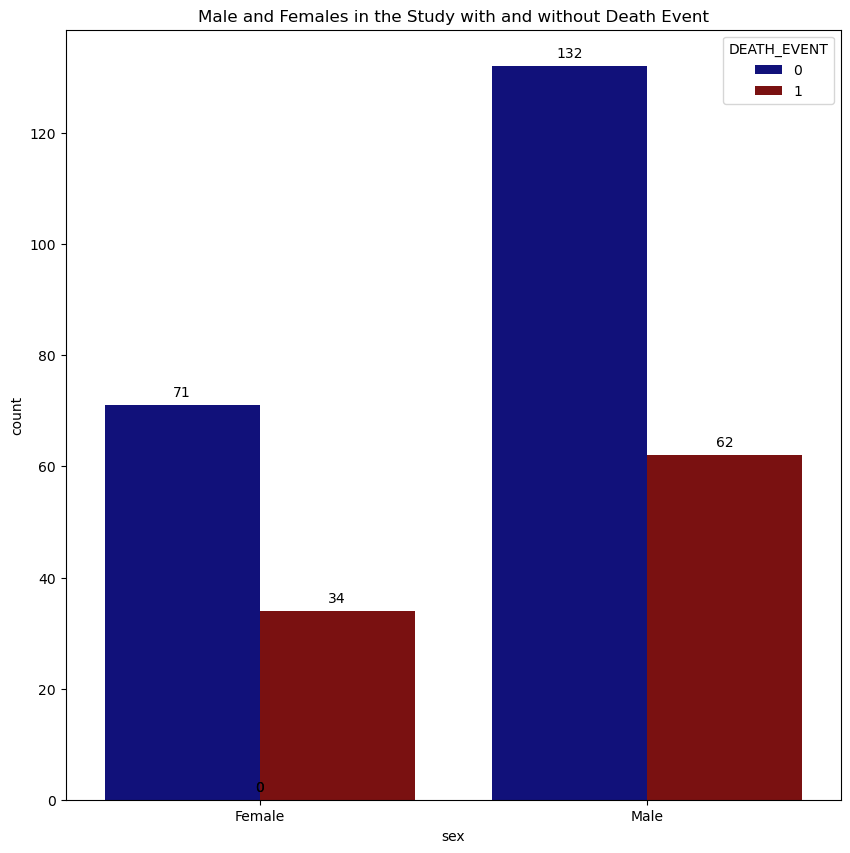

The percentage of female patients is 35.12%
The percentage of deaths that were female is 35.42%
The percentage of male patients is 64.88%
The percentage of deaths that were male is 64.58%
Males had a significantly higher death rate than females.


In [6]:
# Male patients that encountered a death event
male_death = heart_df[(heart_df['sex'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_male_deaths = len(male_death)

# Female patients that encountered a death event
female_death = heart_df[(heart_df['sex'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_female_deaths = len(female_death)

# Count total patients and deaths by sex
total_by_sex = heart_df['sex'].value_counts()
deaths_by_sex = heart_df[heart_df['DEATH_EVENT'] == 1]['sex'].value_counts()

# Calculate percentages
result_df = pd.DataFrame({
    'sex': ['Female', 'Male'],
    'total_count': [total_by_sex[0], total_by_sex[1]],
    'death_count': [deaths_by_sex.get(0, 0), deaths_by_sex.get(1, 0)]
})
result_df['total_percentage'] = (result_df['total_count'] / result_df['total_count'].sum()) * 100
result_df['death_total_percentage'] = (result_df['death_count'] / result_df['death_count'].sum()) * 100

# Step 2: Create the count plot
plt.figure(figsize=(10,10))
cols= ["darkblue","darkred"]

# Creating the countplot
ax = sns.countplot(x=heart_df['sex'], data=heart_df, hue="DEATH_EVENT", palette=cols)

# Changing the x-axis labels from 0,1 to Female, Male
ax.set_xticklabels(['Female', 'Male'])

# Adding text labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Set the title of the plot
ax.set_title("Male and Females in the Study with and without Death Event")

# Display the plot
plt.show()

# Step 3: Display calculated percentages
for index, row in result_df.iterrows():
    if row['sex'] == 'Male':
        print(f"The percentage of male patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were male is {row['death_total_percentage']:.2f}%")
    else:
        print(f"The percentage of female patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were female is {row['death_total_percentage']:.2f}%")

print("Males had a significantly higher death rate than females.")

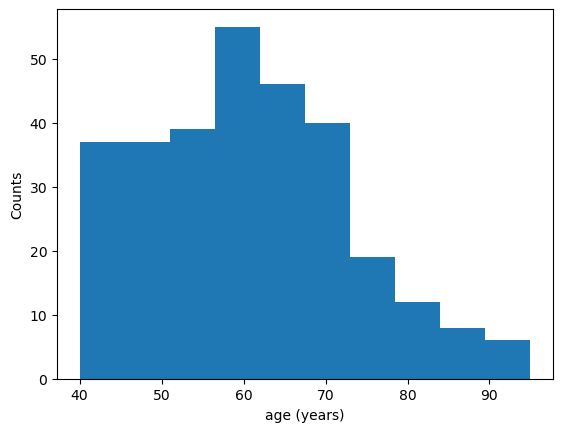

NormaltestResult(statistic=2.7354817181132294, pvalue=0.25468167192281727)
NormaltestResult(statistic=8.951476705758212, pvalue=0.011381815225225153)


In [7]:
# age group vs death count
plt.hist(heart_df['age'])
plt.xlabel('age (years)')
plt.ylabel('Counts')
plt.show()


# Determine the total number of rows in heart_df
total_rows = len(heart_df)

# Ensure sample sizes are within the range of the data size
sample_size_1 = min(50, total_rows)
sample_size_2 = min(300, total_rows)

# Perform the normality test on samples of the 'age' column from heart_df
print(st.normaltest(heart_df["age"].sample(sample_size_1)))
print(st.normaltest(heart_df["age"].sample(sample_size_2)))

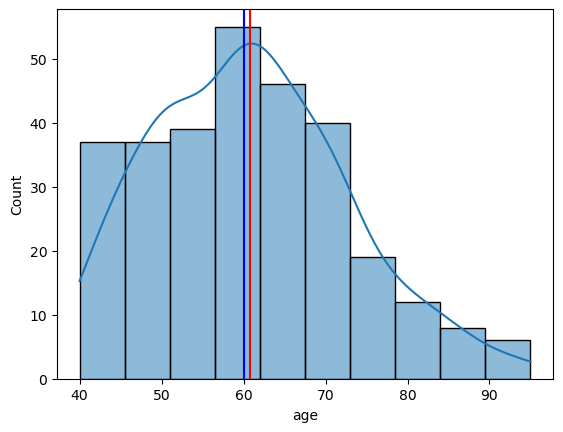

mean 60.83389297658862
median 60.0
mode 0    60.0
Name: age, dtype: float64
Age is one of the major risk factors for heart disease, and as we age, the likelihood of hardening of the blood vessels and atherosclerosis increases, leading to a higher risk of heart disease. 
This data shows that the age average is in the 60's. We found that the old group had the highest prevalence rate, followed by the young and middle-aged groups.  


In [8]:
sns.histplot(heart_df['age'],kde=True)
plt.axvline(heart_df['age'].mean(), color='red')
plt.axvline(heart_df['age'].median(), color='green')
plt.axvline(heart_df['age'].mode()[0], color='blue')
plt.show()

print('mean',heart_df['age'].mean())
print('median',heart_df['age'].median())
print('mode',heart_df['age'].mode())
print("""Age is one of the major risk factors for heart disease, and as we age, the likelihood of hardening of the blood vessels and atherosclerosis increases, leading to a higher risk of heart disease. 
This data shows that the age average is in the 60's. We found that the old group had the highest prevalence rate, followed by the young and middle-aged groups.  """)

In [9]:
# heart disease of age range
age_df = pd.DataFrame()

age_df["age_range"] = pd.cut(x=heart_df["age"],
                             bins=[0, 30, 40, 50 , 60, 70, 80, 90, 100],
                             include_lowest=True,
                             right=False,
                             labels=['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+'])

age_df = pd.concat([age_df["age_range"], heart_df["DEATH_EVENT"]], axis=1)
age_df.head()

at = age_df.groupby(["age_range", "DEATH_EVENT"]).agg({"DEATH_EVENT": "count"})
at.rename(columns={"DEATH_EVENT": "Amount"}, inplace=True)
at = at.reset_index()

C:\Users\18307\AppData\Local\Temp\ipykernel_34164\3142376388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = age_df.groupby(["age_range", "DEATH_EVENT"]).agg({"DEATH_EVENT": "count"})


In [13]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70-79
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50-59
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60-69
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50-59
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60-69


In [14]:
# high blood pressure patients that encountered a death event
high_blood_pressure = heart_df[(heart_df["high_blood_pressure"]==1) & (heart_df["DEATH_EVENT"]==1)]
num_blood_pressure = len(high_blood_pressure)
print(f"The number of high blood Pressure that had a death event: {num_blood_pressure}")
# normal blood pressure that encountered a death event

nor_blood_pressure = heart_df[(heart_df["high_blood_pressure"]== 0) & (heart_df["DEATH_EVENT"]==1)]
num_nor_blood_pressure = len(nor_blood_pressure)
print(f"The number of normal blood Pressure that had a death event: {num_nor_blood_pressure}")
#merge high blood pressure and age group
# high blood pressure patients that encountered a death event by age group
hypertension_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='hypertension_death_count')
hypertension_death_age_group

# normal blood pressure patients that encountered a death event by age group
nor_bloodPerssure_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 0)].groupby('age_group', observed=False).size().reset_index(name='normal_blood_pressure_count')
nor_bloodPerssure_death_age_group

#merge high blood pressure and age group
death_age_group = hypertension_death_age_group.merge(nor_bloodPerssure_death_age_group, on="age_group", how='outer')
death_age_group

The number of high blood Pressure that had a death event: 39
The number of normal blood Pressure that had a death event: 57


,age_group,hypertension_death_count,normal_blood_pressure_count
0,0-29,0,0
1,30-39,0,0
2,40-49,5,9
3,50-59,8,18
4,60-69,6,23
5,70-79,13,16
6,80-89,4,0
7,90+,3,0


In [15]:
# Step 1: Prepare data for the summary
# Grouping and counting for females and males separately based on high blood pressure and age
female_counts = heart_df[(heart_df['sex'] == 0) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group').size()
male_counts = heart_df[(heart_df['sex'] == 1) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group').size()

# Step 2: Combine data into a DataFrame

data_summary = pd.DataFrame({
    "age_group": death_age_group['age_group'],
    "Female": female_counts.values,
    "Male": male_counts.values
})

# Display the summary DataFrame
data_summary

C:\Users\18307\AppData\Local\Temp\ipykernel_34164\3210664766.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_counts = heart_df[(heart_df['sex'] == 0) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group').size()
C:\Users\18307\AppData\Local\Temp\ipykernel_34164\3210664766.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_counts = heart_df[(heart_df['sex'] == 1) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group').size()


,age_group,Female,Male
0,0-29,0,0
1,30-39,0,0
2,40-49,8,6
3,50-59,11,15
4,60-69,11,18
5,70-79,11,18
6,80-89,2,2
7,90+,1,2


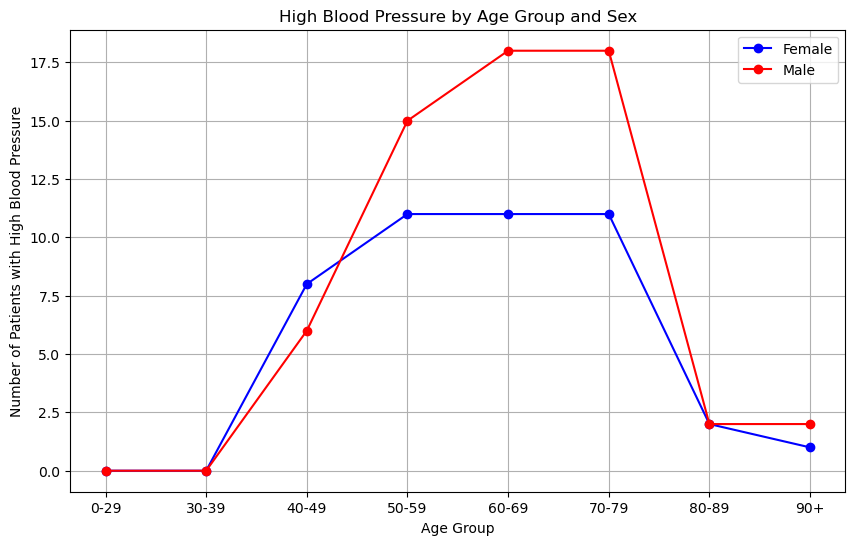

High blood pressure can occur at any age, but in heart disease, the high blood pressure start to happen in early 30, the high rate overall age beweet 60-79; 
In data have show that male with high blood pressure affect in heart disease more than female in high blood pressure.


In [16]:
# Step 1: Create the plot
plt.figure(figsize=(10, 6))

# Plot the female counts
plt.plot(data_summary['age_group'], data_summary['Female'], marker='o', linestyle='-', color='blue', label='Female')

# Plot the male counts
plt.plot(data_summary['age_group'], data_summary['Male'], marker='o', linestyle='-', color='red', label='Male')

# Step 2: Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Patients with High Blood Pressure')
plt.title('High Blood Pressure by Age Group and Sex')

# Step 3: Add a legend
plt.legend()

# Step 4: Show the plot
plt.grid(True)
plt.show()

print("""High blood pressure can occur at any age, but in heart disease, the high blood pressure start to happen in early 30, the high rate overall age beweet 60-79; 
In data have show that male with high blood pressure affect in heart disease more than female in high blood pressure.""")

In [ ]:
ejection_fraction_counts = heart_df['ejection_fraction'].value_counts()

# Sort the ejection fractions by value
ejection_fraction_counts = ejection_fraction_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 55 <= value <= 70 else 'red' for value in ejection_fraction_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ejection_fraction_counts.plot(kind='bar', color=colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (55-70)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Ejection Fraction Value')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

print("""Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.\n 
It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.\n
Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.\n
Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.\n
The majority of these patients have ejection fractions of less than the normal range.""")


In [ ]:
serum_counts = heart_df['serum_creatinine'].value_counts()

# Sort the ejection fractions by value
serum_counts = serum_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 0.6 <= value <= 1.3 else 'red' for value in serum_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
serum_counts.plot(kind='bar', color = colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (0.6 - 1.3)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Serum Creatinine Value')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("""Serum creatinine is a blood test that measures the level of creatinine in your blood. \n
Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. \n 
Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. \n
Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), \n
and for adult women, it is about 0.6 to 1.1 mg/dL.""")

In [ ]:
# Filter the DataFrame for abnormal Serum Creatinine and Ejection Fraction values
filtered_df_abnormal = heart_df[
    (~heart_df["serum_creatinine"].between(0.6, 1.3)) & 
    (~heart_df["ejection_fraction"].between(55, 70))
]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for abnormal values that resulted in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["ejection_fraction"],
            c='red', label='Death Event', alpha=0.5)

# Scatter plot for abnormal values that did not result in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["ejection_fraction"],
            c='blue', label='No Death Event', alpha=0.5)

plt.title('Serum Creatinine vs Ejection Fraction (Abnormal Values) with Death Events')
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()

print("""Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure \n
      from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)\n
From just the data it doesn't appear to be easy to visually see a pattern since there are deaths and no deaths in the same clusters""")

In [ ]:
# Smoking patients that encountered a death event
smoke_death = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"]==1)]
num_smoke_deaths = len(smoke_death)
print(f"The number of smoking that had a death event: {num_smoke_deaths}")

In [ ]:
# Non-Smoking patients that encountered a death event
non_smoke_death = heart_df[(heart_df["smoking"] == 0) & (heart_df["DEATH_EVENT"]==1)]
num_non_smoke_death = len(non_smoke_death)
print(f"The number of non smoking that had a death event: {num_non_smoke_death}")

In [ ]:
#Count total smoke and non-smoke
smoke_counts = heart_df["smoking"].value_counts().rename_axis('smoking').reset_index(name='total_somking_count')
#smoke_counts

#Count smoke and non-smoke with death events
smoke_event_counts = heart_df[heart_df["DEATH_EVENT"]==1]["smoking"].value_counts().rename_axis('smoking').reset_index(name='death_smoke_event_count')
# smoke_event_counts

In [ ]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Replace numeric sex values with labels
smoke_counts['sex'] = smoke_counts['smoking'].replace({1: 'Smoke', 0: 'NonSmoke'})
smoke_event_counts['sex'] = smoke_event_counts['smoking'].replace({1: 'Smoke', 0: 'NonSmoke'})

# Bar plot for total counts
axes[0].bar(smoke_counts['smoking'], smoke_counts['total_somking_count'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Smoke and NonSmoke')
axes[0].set_xlabel('Smoke')
axes[0].set_ylabel('Count')

# Bar plot for death event counts
axes[1].bar(smoke_event_counts['smoking'], smoke_event_counts['death_smoke_event_count'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of Smoke and NonSmoke with Death Event')
axes[1].set_xlabel('Smoke')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# Smoking patients that encountered a death event by age group
smoke_death_age_group = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
smoke_death_age_group
# Non Smoking patients that encountered a death event by age group
non_smoke_death_age_group = heart_df[(heart_df["smoking"] == 0) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
non_smoke_death_age_group

#merge smoke and non-smoke age group
death_age_group = smoke_death_age_group.merge(non_smoke_death_age_group, on="age_group", how='outer')
death_age_group

In [ ]:
heart_df = pd.DataFrame(heart_df)

# Grouping data by age group, smoking, and diabetes
grouped_df = heart_df.groupby(['age_group', 'smoking', 'diabetes'])['DEATH_EVENT'].sum().unstack(fill_value=0)
grouped_df
grouped_df.unstack(level='smoking').plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'purple'])
plt.title('Death Events by Smoking and Diabetes Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.legend(title="Status", labels=["Non-Smoker, Non-Diabetic", "Non-Smoker, Diabetic", "Smoker, Non-Diabetic", "Smoker, Diabetic"])
plt.show()

In [ ]:
grouped_df = heart_df.groupby('age_group').mean()
correlation_matrix =grouped_df[['smoking', 'diabetes', 'DEATH_EVENT']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Age Groups, Smoking, Diabetes, and Death Event')
plt.show()

In [ ]:
sns.pairplot(heart_df, hue='age_group', vars=['smoking', 'diabetes', 'DEATH_EVENT'])
plt.suptitle('Pair Plot of Smoking, Diabetes, and Death Event by Age Group', y=1.02)
plt.show()

In [ ]:
sns.pairplot(heart_df, hue='DEATH_EVENT', vars=['age', 'smoking', 'diabetes'])
plt.suptitle('Pair Plot of Age, Smoking, Diabetes with DEATH_EVENT', y=1.02)
plt.show()

In [ ]:
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

heart_df['platelet_group'] = np.where(heart_df['platelets'] >= heart_df['platelets'].median(), 'High Platelets', 'Low Platelets')

grouped_df = heart_df.groupby(['age_group', 'platelet_group', 'anaemia'])['DEATH_EVENT'].sum().reset_index()

heatmap_data = grouped_df.pivot_table(index='age_group', columns=['platelet_group', 'anaemia'], values='DEATH_EVENT', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Death Events by Age Group, Platelet Count, and Anemia Status')
plt.xlabel('Platelet Group and Anemia Status')
plt.ylabel('Age Group')

plt.tight_layout()
plt.show()

In [ ]:
# Patients with amaenia that encountered a death event
anaemia_death = heart_df[(heart_df['anaemia'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_anaemia_deaths = len(anaemia_death)
print(f"The number of anaemic patients that had a death event: {num_anaemia_deaths}")

In [ ]:
# Patients without anaemia that encountered a death event 
non_anaemia_death = heart_df[(heart_df['anaemia'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_non_anaemia_deaths = len(non_anaemia_death)
print(f"The number of non-anaemic patients that had a death event: {num_non_anaemia_deaths}")

In [ ]:
#Count total of amaemic/non anaemic patients
anaemia_counts = heart_df['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='total_count')

#Count anaemic/non anaemic patients with death events
death_event_counts = heart_df[heart_df['DEATH_EVENT'] == 1]['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='death_event_count')

# Replace numeric sex values with labels
anaemia_counts['anaemia'] = anaemia_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})
death_event_counts['anaemia'] = death_event_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for total counts
axes[0].bar(anaemia_counts['anaemia'], anaemia_counts['total_count'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Anaemic and Non-Anaemic Patients')
axes[0].set_xlabel('Anaemia')
axes[0].set_ylabel('Count')
# Bar plot for death event counts
axes[1].bar(death_event_counts['anaemia'], death_event_counts['death_event_count'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of Anaemic and Non-Anaemic Patients with Death Event')
axes[1].set_xlabel('Anaemia')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()